In [75]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_excel('data.xlsx', index_col=None, header=0) # чтение файла и создание dataframe
df = df.drop(['Unnamed: 5'], axis=1) # удаление пустого столбца без значений
df

,client_id,sum,status,sale,new/current,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,-,-
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26 00:00:00
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00
...,...,...,...,...,...,...,...
725,285.0,4328.7,ОПЛАЧЕНО,Васильев,текущая,оригинал,2021-11-15 00:00:00
726,360.0,3096.2,ОПЛАЧЕНО,Васильев,новая,НЕТ,NaN
727,360.0,3096.2,ПРОСРОЧЕНО,Васильев,новая,НЕТ,NaN
728,373.0,4403.7,ОПЛАЧЕНО,Михайлов,новая,оригинал,2021-11-08 00:00:00


In [76]:
### Разбиение по месяцам

select_column = df['status'] # выбираем столбец статус
be_m = select_column.where(select_column == 'Май 2021').dropna().index[0] # находим индекс начала месяца
en_m = select_column.where(select_column == 'Июнь 2021').dropna().index[0] # находим индекс конца месяца
may = df[be_m+1:en_m] # май

be_jun = select_column.where(select_column == 'Июнь 2021').dropna().index[0] # находим индекс начала месяца
en_jun = select_column.where(select_column == 'Июль 2021').dropna().index[0] # находим индекс конца месяца
june = df[be_jun+1:en_jun] # июнь

be_jul = select_column.where(select_column == 'Июль 2021').dropna().index[0] # находим индекс начала месяца
en_jul = select_column.where(select_column == 'Август 2021').dropna().index[0] # находим индекс конца месяца
july = df[be_jul+1:en_jul] # июль

be_a = select_column.where(select_column == 'Август 2021').dropna().index[0] # находим индекс начала месяца
en_a = select_column.where(select_column == 'Сентябрь 2021').dropna().index[0] # находим индекс конца месяца
august = df[be_a+1:en_a] # август

be_s = select_column.where(select_column == 'Сентябрь 2021').dropna().index[0] # находим индекс начала месяца
en_s = select_column.where(select_column == 'Октябрь 2021').dropna().index[0] # находим индекс конца месяца
september = df[be_s+1:en_s] # сентябрь

be_o = select_column.where(select_column == 'Октябрь 2021').dropna().index[0] # находим индекс начала месяца
en_o = len(df)
october = df[be_o+1:en_o] # октябрь

In [77]:
### Вопрос 1
  
question_1 = july.where(df['status'] != 'ПРОСРОЧЕНО') # вывод датафрейма без статуса просрочено
res_sum_1 = sum(question_1['sum'].dropna())  # сумма столбца
res_group_1 = july.groupby(['status']).sum()  # сумма группировкой
print('Cумма выручки за июль без просрочек:', res_sum_1) # вывод суммы
res_group_1['sum'] # вывод суммы

Cумма выручки за июль без просрочек: 859896.4699999987


status
ОПЛАЧЕНО      859896.47
ПРОСРОЧЕНО      1977.70
Name: sum, dtype: float64

,months,sum
0,may,809572.19
1,june,810266.11
2,july,861874.17
3,august,850435.79
4,september,820383.78
5,october,1033148.39


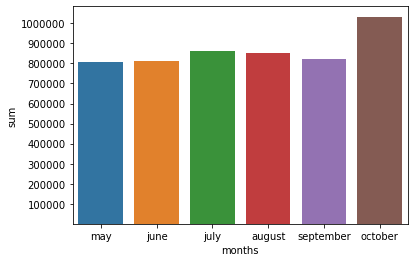

In [79]:
### Вопрос 2

s_m = sum(may['sum'])
s_jun = sum(june['sum'])
s_jul = sum(july['sum'])
s_a = sum(august['sum'])
s_s = sum(september['sum'])
s_o = sum(october['sum'])

x = ['may', 'june', 'july', 'august', 'september', 'october']
y = [s_m, s_jun, s_jul, s_a, s_s, s_o]
data_for_fig = pd.DataFrame({'months' : x, 'sum' : y})

g = sns.barplot(x='months', y='sum', data=data_for_fig)
ticks = range(100000, 1100000, 100000)
g.set_yticks(ticks)
g.set_yticklabels(ticks)
data_for_fig

In [80]:
### Вопрос 3

res_3 = september.groupby(['sale']).sum()['sum'] # группировка по сотрудникам
res_3.sort_values(ascending=False)[:1] # сортировка по прибыли

sale
Смирнов    221525.7
Name: sum, dtype: float64

In [81]:
### Вопрос 4

res_group_4 = october.groupby(['new/current']).count() # считаем количество новых и текущих сделок
res_4_new = october['new/current'].where(october['new/current'] == 'новая').dropna() # решение через булеву маску
res_4_now = october['new/current'].where(october['new/current'] == 'текущая').dropna() # решение через булеву маску
if len(res_4_new) > len(res_4_now):
    print('Преобладает статус: новая')
elif len(res_4_new) < len(res_4_now):
    print('Преобладает статус: текущая')   
else:
    print('Равное количество статусов по сделкам')
res_group_4 # вывод группировки 

Преобладает статус: текущая


,client_id,sum,status,sale,document,receiving_date
new/current,,,,,,
новая,36,36,36,36,36,5
текущая,99,99,99,99,97,40


In [82]:
### Вопрос 5

d_s = may.where(may['document'] == 'оригинал').dropna() # проверка на наличие оригинала
d_s['receiving_date'] = pd.to_datetime(d_s['receiving_date']) # смена формата
res_5 = d_s.where(d_s['receiving_date'].dt.month == 6).dropna() # проверка на месяц получения оригинала
print('Количество оригиналов договора по майским сделкам получено в июне:', len(res_5)) 

Количество оригиналов договора по майским сделкам получено в июне: 76


In [83]:
### Задание 1

bonus = df.where(df['document'] == 'оригинал').dropna() # проверка на наличие оригинала
bonus = df.where(bonus['receiving_date'] == datetime.datetime(2021, 7, 1, 0, 0)).dropna() # проверка на месяц получения оригинала
bonus_new = bonus.where(bonus['status'] == 'ОПЛАЧЕНО') # запись строк только с ОПЛАЧЕНО
bonus.loc[bonus_new['new/current'] == 'новая', 'bonus_for_manager_new'] = bonus_new['sum']*0.07 # сумма остатка для новых сделок
bonus_сurrent = bonus.where(bonus['status'] != 'ПРОСРОЧЕНО') # запись строк только с не ПРОСРОЧЕНО
bonus_сurrent = bonus_сurrent.where(bonus_сurrent['new/current'] == 'текущая') # запись строк только с текущей сделкой
bonus.loc[bonus_сurrent['sum'] >= 10000, 'bonus_for_manager_current'] = bonus_сurrent['sum']*0.05 # сумма остатка для текущих сделок выше 10000
bonus.loc[bonus_сurrent['sum'] < 10000, 'bonus_for_manager_current'] = bonus_сurrent['sum']*0.03 # сумма остатка для текущих сделок ниже 10000

bonus = bonus.groupby('sale').sum()
bonus[["bonus_for_manager_new", "bonus_for_manager_current"]] # остаток на 01.07.2021 по 5 и 6 месяцам

,bonus_for_manager_new,bonus_for_manager_current
sale,,
Андреев,0.0,88.422
Иванов,0.0,212.661
Смирнов,0.0,140.793
